<a href="https://colab.research.google.com/github/Atikuzzaman101/Clustering-and-Fitting/blob/main/Clustering_and_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Load the dataset

In [4]:
data = pd.read_csv('states.csv')

Select columns for analysis


In [5]:
columns = ['Population', 'Area (km²)', 'Population Density', 'GDP ($, millions)']
data = data[columns]

Handle missing values


In [7]:
data['GDP ($, millions)'].fillna(data['GDP ($, millions)'].median(), inplace=True)

<ipython-input-7-35d5ff6767e2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GDP ($, millions)'].fillna(data['GDP ($, millions)'].median(), inplace=True)


Normalize the data


In [8]:
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=columns)

Elbow Method to determine optimal clusters


In [9]:
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)


Plot the Elbow Curve


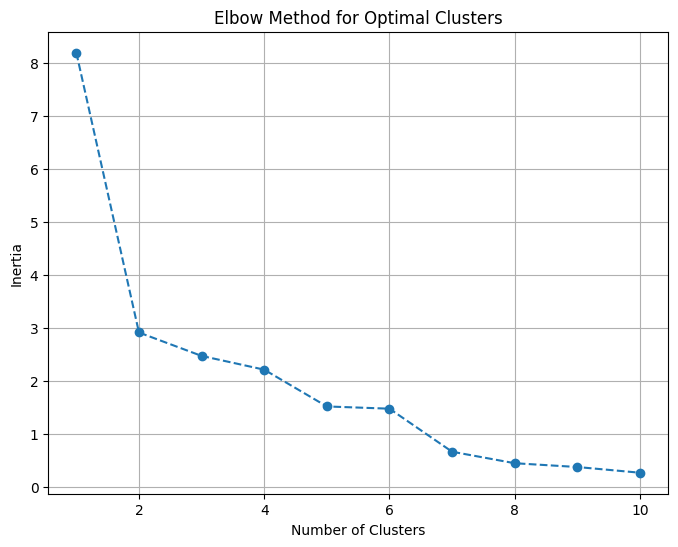

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Apply k-means clustering (choose k=3 as an example)


In [11]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
data['Cluster'] = kmeans.fit_predict(normalized_data)

Scatter plot of clusters


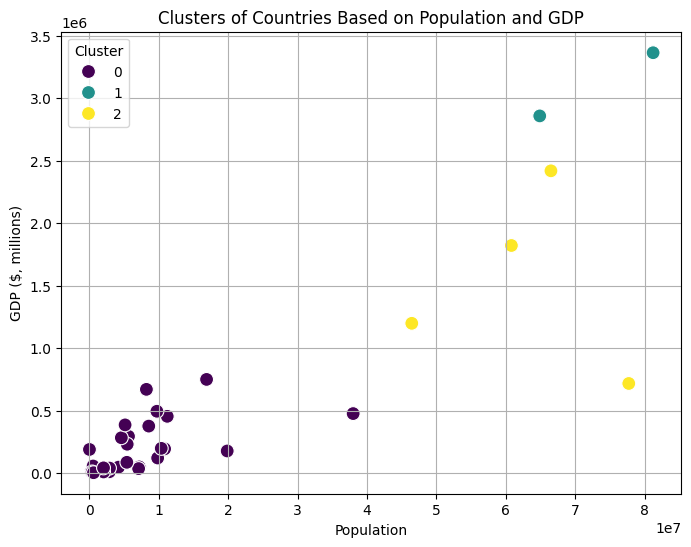

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['Population'],
    y=data['GDP ($, millions)'],
    hue=data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clusters of Countries Based on Population and GDP')
plt.xlabel('Population')
plt.ylabel('GDP ($, millions)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

Linear regression


In [13]:
X = data[['Population', 'Area (km²)']]
y = data['GDP ($, millions)']

model = LinearRegression()
model.fit(X, y)

data['Predicted GDP'] = model.predict(X)

Scatter plot with regression line

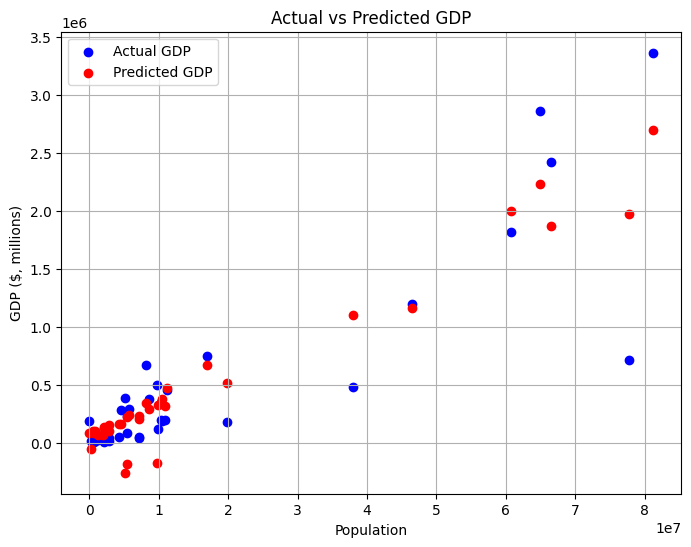

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Population'], data['GDP ($, millions)'], color='blue', label='Actual GDP')
plt.scatter(data['Population'], data['Predicted GDP'], color='red', label='Predicted GDP')
plt.title('Actual vs Predicted GDP')
plt.xlabel('Population')
plt.ylabel('GDP ($, millions)')
plt.legend()
plt.grid()
plt.show()

Calculate model performance

In [15]:

mse = mean_squared_error(y, data['Predicted GDP'])
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 127319502049.43
